In [1]:
import numpy as np
import pandas as pd

In [2]:
df_a_raw = pd.read_csv('data/section_a.csv', skiprows=2, skipfooter=1)
df_a = df_a_raw.copy()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


### Unstructured/Incorrect Data

In [3]:
# ROWS WITH INVALID GENDER
df_a_raw[(df_a_raw['sex_male'] != 1.0) & (df_a_raw['sex_female'] != 1.0)]

name_of_interviewer family_member_names position_in_the_family  \
248                    NaN                 NaN                    NaN   
375        CHACON, Gabriel       [no response]                    NaN   
451           CUETO, Mason       [no response]                    NaN   
522  DELOS REYES, Chenalee                 NaN                    NaN   

     sex_male  sex_female  age highest_educational_attainment civil_status  \
248       NaN         NaN  NaN                            NaN          NaN   
375       NaN         NaN  NaN                            NaN          NaN   
451       NaN         NaN  NaN                            NaN          NaN   
522       NaN         NaN  NaN                            NaN          NaN   

    occupation gross_monthly_income          ...           budget_for_food_75  \
248        NaN                    0          ...                          NaN   
375        NaN                  NaN          ...                          NaN   
451        NaN                  NaN          ...                          NaN   
522        NaN                  NaN          ...                          NaN   

     budget_for_food_50_75  budget_for_food_25_49  budget_for_food_24  \
248                    NaN                    NaN                 NaN   
375                    NaN                    NaN                 NaN   
451                    NaN                    NaN                 NaN   
522                    NaN                    NaN                 NaN   

     budget_for_food_enough_yes  budget_for_food_enough_no  \
248                         NaN                        NaN   
375                         NaN                        NaN   
451                         NaN                        NaN   
522                         NaN                        NaN   

     budget_for_health_75  budget_for_health_50_74  budget_for_health_25_49  \
248                   NaN                      NaN                      NaN   
375                   NaN                      NaN                      NaN   
451                   NaN                      NaN                      NaN   
522                   NaN                      NaN                      NaN   

     budget_for_health_24  
248                   NaN  
375                   NaN  
451                   NaN  
522                   NaN  

[4 rows x 35 columns]

In [4]:
# ROWS WITH INVALID AGE
def identify_invalid_age(age):
    try:
        float(age)
    except:
        return age

df_a_raw['age'].apply(lambda x: identify_invalid_age(x)).dropna()

4      6 months
11     6 months
73     2 months
132      3 mos.
141      5 mos.
174    3 months
218       8 mos
236       8 mos
336    7 months
608       7 mos
Name: age, dtype: object

In [5]:
# ROWS WITH INVALID GROSS MONTLY INCOME
# Usually ranged values like "10,000 - 20,000"

def identify_invalid_income(income):
    try:
        float(income)
    except:
        return income

df_a_raw['gross_monthly_income'].apply(lambda x: identify_invalid_income(x)).dropna();

In [6]:
# INVALID CIVIL STATUS VALUES
valid_values = ['Single', 'Married', "Divorced", "Widowed", "Separated", 'Live-in']
for x in df_a_raw['civil_status']:
    x = str(x)
    if x.capitalize() not in valid_values:
        print("'%s'" % x)

'nan'
'Single '
'nan'
'married '
'Single '
'nan'
'Singe'
'nan'
'Single '


### SANITATION

In [7]:
# SEX
def map_sex(row):
    sexes = ['Male','Female']
    try:
        return sexes[row.tolist().index(1)]
    except:
        return None

cols = ['sex_male','sex_female']
df_a['sex'] = df_a_raw[cols].apply(lambda row: map_sex(row), axis=1)


In [8]:
# AGE
def convert_age_to_number(age):
    try:
        return round(float(age), 2)
    except:
        age = float(age.split()[0])
        age = age/12
        return round(age, 2)
    
df_a['age'] = df_a_raw['age'].apply(lambda x: convert_age_to_number(x))

In [9]:
# MONTHLY INCOME
def parse_income(income):
    numbers = [x.strip() for x in str(income).split('-')]
    numbers = [''.join(x.split(',')) for x in numbers]
    numbers = [float(''.join(x.split())) for x in numbers]
    return np.mean(numbers)

df_a['gross_monthly_income'] = df_a_raw['gross_monthly_income'].apply(lambda x: parse_income(x))

In [10]:
# CIVIL STATUS
def sanitize_civil_status(x):
    valid_values = ['Single', 'Married', "Divorced", "Widowed", "Separated", 'Live-in']
    x = str(x).capitalize().strip()
    if x == "Singe":
        x = "Single"
    return x
    
df_a['civil_status'] = df_a_raw['civil_status'].apply(lambda x: sanitize_civil_status(x))


In [11]:
# FAMILY STRUCTURE
def map_family_structure(row):
    structure = ['Nuclear','Extended','Blended','Communal','Single Parent']
    try:
        return structure[row.tolist().index(1)]
    except:
        return None

cols = ['family_structure_nuclear','family_structure_extended','family_structure_blended','family_structure_communal','family_structure_single_parent']

df_a['family_structure'] = df_a_raw[cols].apply(lambda row: map_family_structure(row), axis=1)


In [12]:
# RELIGION
def map_religion(row):
    religions = ['Roman Catholic','Protestant','Iglesia Ni Cristo','Islam','Christian','Adventist','Others']
    try:
        return religions[row.tolist().index(1)]
    except:
        return None

cols = ['religion_roman_catholic','religion_protestant','religion_iglesia_ni_cristo','religion_islam','religion_christian','religion_adventist', 'religion_others']

df_a['religion'] = df_a_raw[cols].apply(lambda row: map_religion(row), axis=1)


In [13]:
# HEALTH PRACTICES
def map_health_practices(row):
    values = ['Manghihilot',
                'Albularyo',
                'Others']
    try:
        return values[row.tolist().index(1)]
    except:
        return 'None'

cols = ['health_practices_manghihilot',
        'health_practices_albularyo',
        'health_practices_others',]

df_a['health_practices'] = df_a_raw[cols].apply(lambda row: map_health_practices(row), axis=1)


In [14]:
# BUDGET FOR FOOD
def map_food_budget(row):
    values = ['>/= 75%','50-74%','25-49%','</= 24%']
    try:
        return values[row.tolist().index(1)]
    except:
        return 'None'

cols = ['budget_for_food_75','budget_for_food_50_75','budget_for_food_25_49','budget_for_food_24']

df_a['budget_for_food'] = df_a_raw[cols].apply(lambda row: map_food_budget(row), axis=1)


In [15]:
# BUDGET FOR HEALTH
def map_health_budget(row):
    values = ['>/= 75%','50-74%','25-49%','</= 24%']
    try:
        return values[row.tolist().index(1)]
    except:
        return 'None'

cols = ['budget_for_health_75','budget_for_health_50_74','budget_for_health_25_49','budget_for_health_24']

df_a['budget_for_health'] = df_a_raw[cols].apply(lambda row: map_health_budget(row), axis=1)


In [16]:
# BUDGET FOR HEALTH ENOUGH
def map_health_budget_enough(row):
    values = ['Yes','No']
    try:
        return values[row.tolist().index(1)]
    except:
        return 'None'

cols = ['budget_for_food_enough_yes','budget_for_food_enough_no']

df_a['budget_for_food_enough'] = df_a_raw[cols].apply(lambda row: map_health_budget_enough(row), axis=1)


In [17]:
# POSITION IN THE FAMILY
def map_position_in_the_family(x):
    mother = [ "Mother", "Wife", "Mother (/live-in partner)", ]
    father = [ "Father", "Husband of Harlene", "Stepfather", "Husband", ]
    grandfather = [ "Grandfather", ]
    grandmother = [ "Grandmother", "Great Grandmother", ]
    uncle = [ "Brother of Mother", ]
    aunt = []
    brother_in_law = [ "Brother-in-law", ]
    sister_in_law = [ "Sister-In-Law", ]
    child = [ "Brother", "Sister", "Sibling", "First Child", "Second Child", "Third Child", "Grandchild", "Grandchild,", "Child of Harlene", "Daughter", "Son-in-law", "Fourth Child", "Daughter-in-law", "Nephew of Mother", "Granddaughter", "First grandson", "seoncd grandson", "Fifth Child", "Adopted Daughter", "Adopted son", "1st Child", "2nd Child", "Niece", "Tenth Child", "Son", "Sixth Child", ]
    others = [ "Male", "Live-in partner", "Live-in partner ", "Partner", "Brother-in-law", "Relationship not indicated", "Live-in partner of Maricon", ]
     
    if(x in mother):
        return "Mother"
    elif(x in father):
        return "Father"
    elif(x in grandfather):
        return "Grandfather"
    elif(x in grandmother):
        return "Grandmother"
    elif(x in uncle):
        return "Uncle"
    elif(x in aunt):
        return "Aunt"
    elif(x in brother_in_law):
        return "Brother in Law"
    elif(x in sister_in_law):
        return "Sister in Law"
    elif(x in child):
        return "Child"
    else:
        return "Others"
    

df_a['position_in_the_family'] = df_a_raw['position_in_the_family'].apply(lambda x: map_position_in_the_family(x))


In [18]:
def map_educational_attainment(x):
    college = [ "4th Year College-currently", "1st Year College", "2nd year College", "3rd Year College-currently", "1st Year College-currently", "2nd Year College", "4th Year College", ]
    high_school = [ "Second Year High School", "2ndYear High School", "4th Year High School", "4t Year High School", "1st year High School", "1st Year High School", "2nd Year High School", "3rd year High School", "4th Year High School - currently", "4th year High School", "4th Year High School-currently", "3rd Year High School-currently", "3rd Year High School", "3rd Year High School - currently", "1st Year High School-currently", "High School undergraduate", "High School", ]
    grade_school = [ "Grade 3-currently", "Grade 1-currently", "2", "Grade 6", "Grade 5", "Grade 11-currently", "Grade 6-currently", "Grade 2-currently", "Grade 4-currently", "Grade 12-currently", "Grade 9-currently", "Grade School (still in school)", "Grade 5-currently", "Grade 4", "Grade 7", "Grade 10-currently", "Grade 3", "Grade 9", "Grade 10", "Grade 1", "Grade 2", "Grade 7-currently", "Grade 8-currently", "Grade 12 - currently", "Grade 9 - currently", "Grade 2 - currently", "Elementary Grade 6", "Grade School", ]
    pre_school = [ "Daycare-currently", "Daycare", "Kinder-currently", "Kindergarten-currently", ]
    others = [ "nan", "not able to ask", "None", "Vocational ", "Vocational" ]

    attainment = ""
    x = str(x)
    
    if(x in college):
        attainment = "College"
    elif(x in high_school):
        attainment = "High School"
    elif(x in grade_school):
        attainment = "Grade School"
    elif(x in pre_school):
        attainment = "Pre-School"
    else:
        attainment = "Others"
     
    if(len(x.split('-')) > 1):
        if(x.split('-')[1] == "currently"):
            attainment += " - currently"
        
    return attainment
    
df_a['highest_educational_attainment'] = df_a_raw['highest_educational_attainment'].apply(lambda x: map_educational_attainment(x))


## TALLIES and Charts

In [19]:
def annotate_chart(chart, xoffset=-0.3, yoffset=1):
    for p in chart.patches:
        b = p.get_bbox()
        val = b.y1 + b.y0  
        ax.annotate(val, ((b.x0 + b.x1)/2 + xoffset, b.y1 + yoffset))

In [20]:
ax = df_a['position_in_the_family'].value_counts().plot(kind="bar", figsize=[10,10], title="Position in the Family")
annotate_chart(ax)
# df_a['position_in_the_family'].value_counts()


Male      316
Female    294
Name: sex, dtype: int64

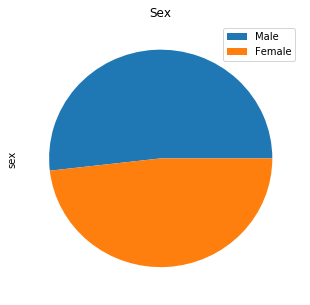

In [21]:
df_a['sex'].value_counts().plot(kind="pie", figsize=[5,5], title="Sex", legend=True, labels=None)
df_a['sex'].value_counts()


High School                 224
Grade School                172
Grade School - currently    135
College                      36
Others                       17
High School - currently      13
Pre-School - currently       12
College - currently           4
Pre-School                    1
Name: highest_educational_attainment, dtype: int64

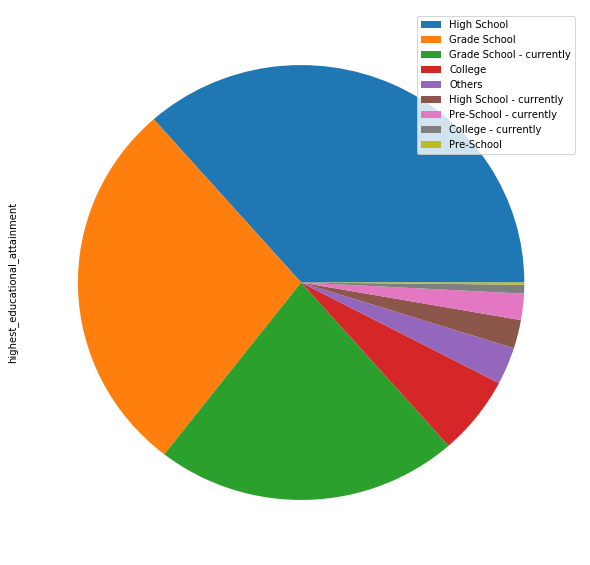

In [22]:
df_a['highest_educational_attainment'].value_counts().plot(kind="pie", legend=True, labels=None, figsize=[10,10])
df_a['highest_educational_attainment'].value_counts()


Single       398
Married      193
Widowed       11
Separated      6
Nan            4
Live-in        1
Divorced       1
Name: civil_status, dtype: int64

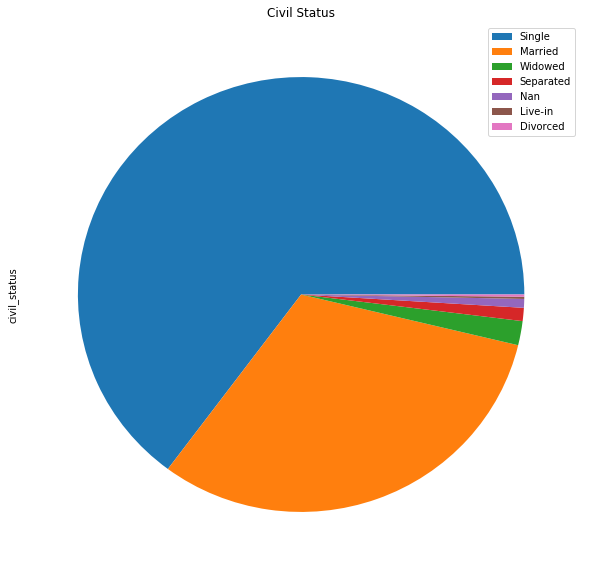

In [23]:
df_a['civil_status'].value_counts().plot(kind="pie", figsize=[10,10], title="Civil Status", labels=None, legend=True)
df_a['civil_status'].value_counts()


Nuclear          93
Extended         36
Single Parent     8
Blended           3
Communal          1
Name: family_structure, dtype: int64

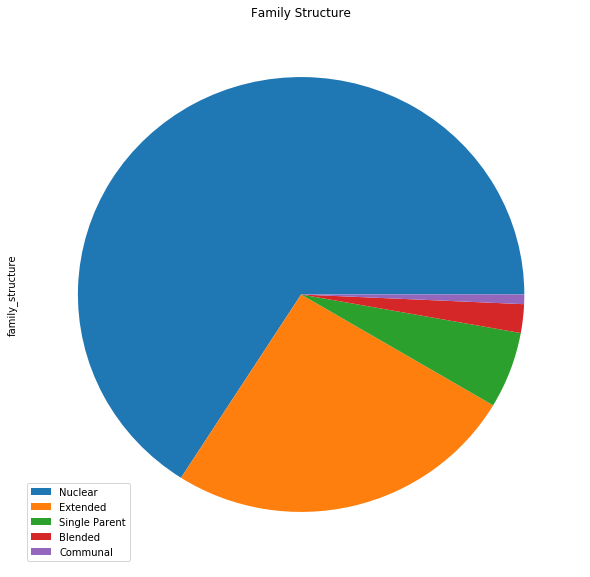

In [24]:
df_a['family_structure'].value_counts().plot(kind="pie", title="Family Structure", figsize=[10,10], labels=None, legend=True)
df_a['family_structure'].value_counts()


Roman Catholic       118
Iglesia Ni Cristo     14
Christian              6
Others                 1
Name: religion, dtype: int64

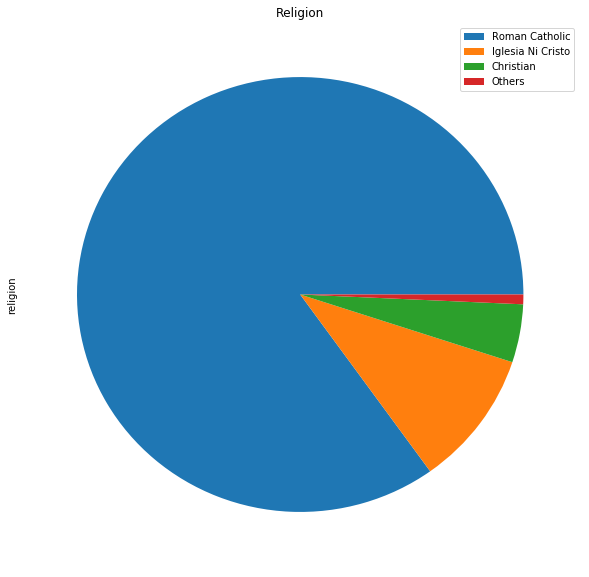

In [25]:
df_a['religion'].value_counts().plot(kind="pie", title="Religion", figsize=[10,10], labels=None, legend=True)
df_a['religion'].value_counts()


None           512
Manghihilot     91
Albularyo       11
Name: health_practices, dtype: int64

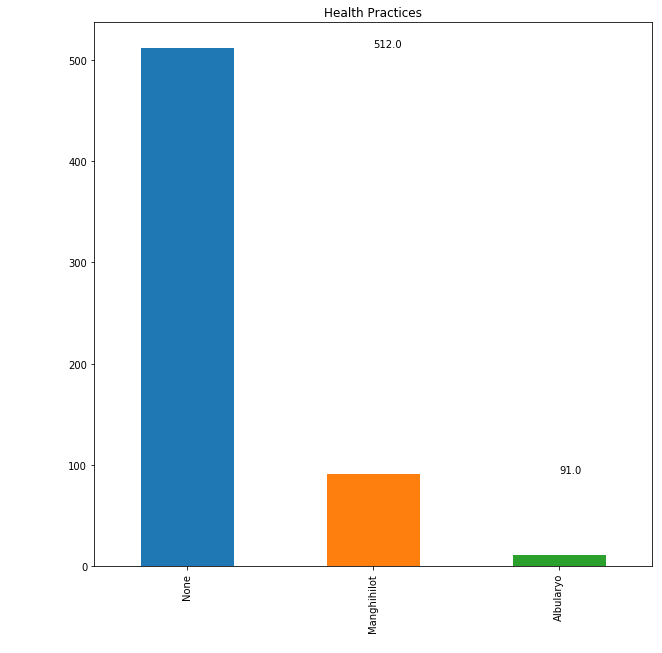

In [26]:
ax = df_a['health_practices'].value_counts().plot(kind="bar", title="Health Practices", figsize=[10,10])
annotate_chart(ax, xoffset=1)
df_a['health_practices'].value_counts()


None       474
50-74%      59
>/= 75%     37
25-49%      29
</= 24%     15
Name: budget_for_food, dtype: int64

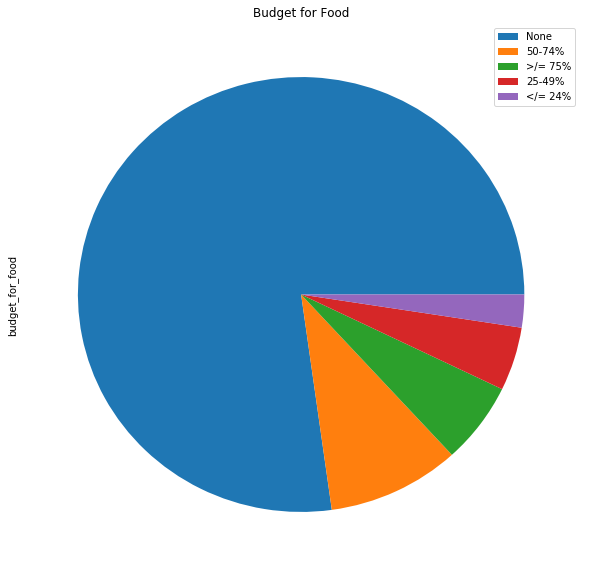

In [27]:
df_a['budget_for_food'].value_counts().plot(kind="pie", title="Budget for Food", figsize=[10,10], labels=None, legend=True)
df_a['budget_for_food'].value_counts()


None    472
Yes     117
No       25
Name: budget_for_food_enough, dtype: int64

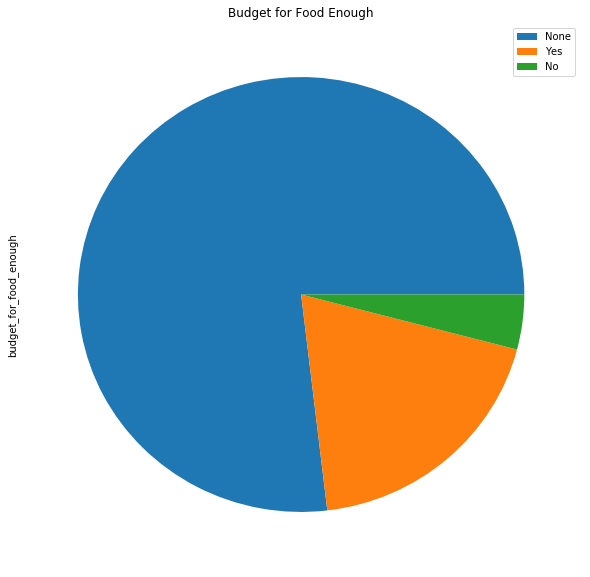

In [28]:
df_a['budget_for_food_enough'].value_counts().plot(kind="pie", title="Budget for Food Enough", figsize=[10,10], labels=None, legend=True)
df_a['budget_for_food_enough'].value_counts()


None       473
</= 24%    106
25-49%      25
50-74%       8
>/= 75%      2
Name: budget_for_health, dtype: int64

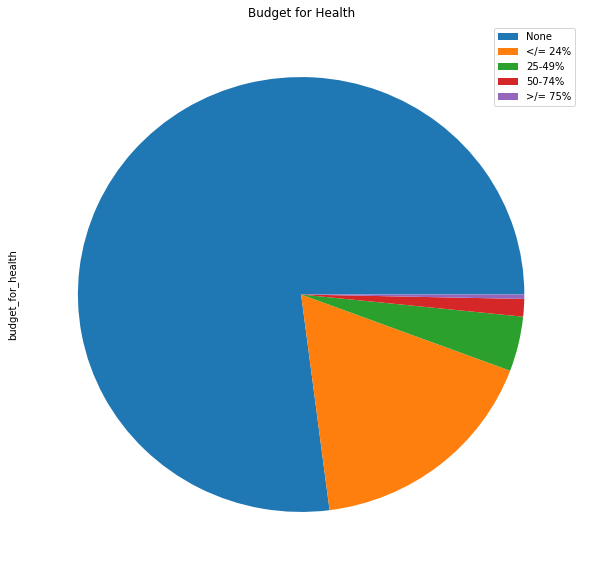

In [29]:
df_a['budget_for_health'].value_counts().plot(kind="pie", title="Budget for Health", figsize=[10,10], labels=None, legend=True)
df_a['budget_for_health'].value_counts()


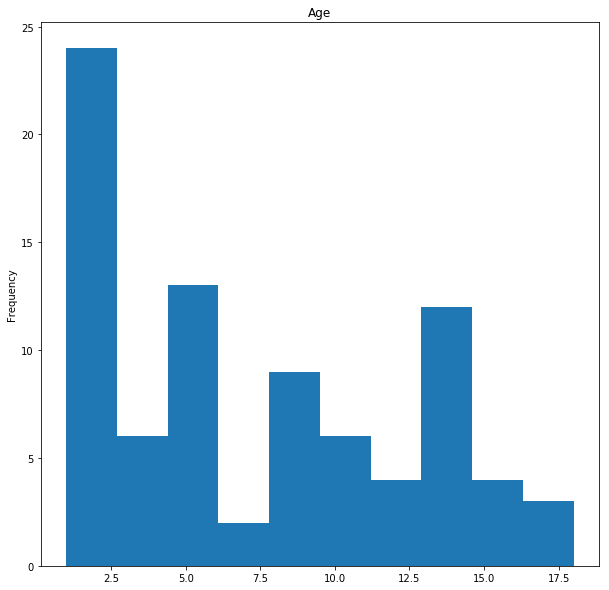

In [30]:
df_a['age'].value_counts().plot(kind='hist', title="Age", figsize=[10,10])


In [ ]:
df_a